In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets.cifar10 import load_data
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Sequential
import matplotlib.pyplot as plt
import os
import cv2
import glob
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Flatten, Dense, Activation
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.python.keras.layers.core import Dropout
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.layers.normalization import BatchNormalization


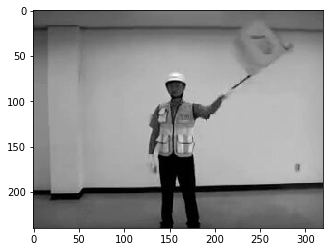

In [4]:

DATADIR = '/home/pirl/Downloads/testData'
CATEGORIES = ['11_000', '11_001', '11_002']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break


In [7]:
print(img_array.shape)

(240, 320)


In [3]:
IMG_SIZE = 64

#new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

In [9]:
#training_data=[]

# DATADIR = '/home/pirl/Downloads/testData'
# CATEGORIES = ['11_000', '11_001', '11_002']
path = '/home/pirl/Downloads/testData/training_data/*.npz'
training_data = glob.glob(path)
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

In [4]:
#training_data=[]

# DATADIR = '/home/pirl/Downloads/testData'
# CATEGORIES = ['11_000', '11_001', '11_002']

def create_training_data(random_state = 42):
    path = '/home/pirl/Downloads/testData/new/training_data1/*.npz'
    #training_data = glob.glob(path)
    x_train = np.empty((0, 64, 64, 1))
    y_train = np.empty((0, 3))
    training_data = glob.glob(path)
    for single_npz in training_data:
        with np.load(single_npz) as data:
            x = data['train']
            y = data['training_labels']
        x = np.reshape(x, (-1, 64, 64, 1))

        x_train = np.vstack((x_train, x))
        y_train = np.vstack((y_train, y))
    return train_test_split(x_train, y_train, test_size=0.3 ,random_state= random_state)
    
x_train1, x_test1, y_train1, y_test1 = create_training_data(random_state = 42)


show data!!!


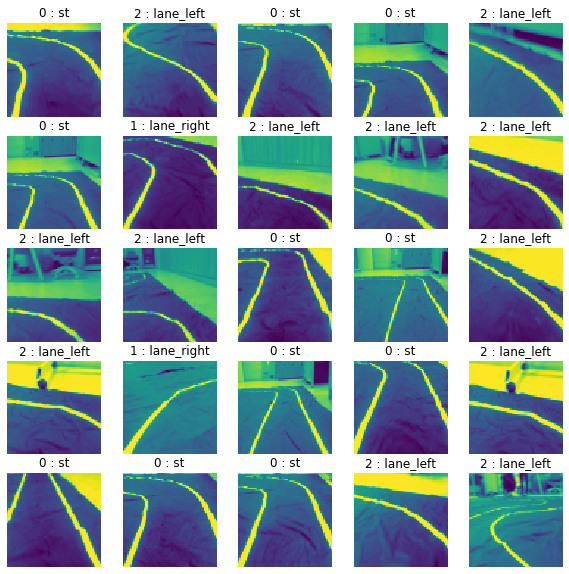

In [5]:
print(x_train1)
print(x_train1.shape)
# plt.imshow(x_train1, cmap='gray')
# plt.show()


[[[[ 251.]
   [ 251.]
   [ 250.]
   ..., 
   [ 205.]
   [ 193.]
   [ 163.]]

  [[ 251.]
   [ 251.]
   [ 251.]
   ..., 
   [ 208.]
   [ 205.]
   [ 202.]]

  [[ 251.]
   [ 251.]
   [ 251.]
   ..., 
   [ 210.]
   [ 208.]
   [ 208.]]

  ..., 
  [[ 115.]
   [ 117.]
   [ 120.]
   ..., 
   [  92.]
   [  93.]
   [  94.]]

  [[ 117.]
   [ 117.]
   [ 121.]
   ..., 
   [  94.]
   [  92.]
   [  94.]]

  [[ 116.]
   [ 118.]
   [ 129.]
   ..., 
   [  94.]
   [  92.]
   [  93.]]]


 [[[ 167.]
   [ 167.]
   [ 168.]
   ..., 
   [ 244.]
   [ 244.]
   [ 244.]]

  [[ 170.]
   [ 169.]
   [ 171.]
   ..., 
   [ 246.]
   [ 247.]
   [ 247.]]

  [[ 177.]
   [ 178.]
   [ 179.]
   ..., 
   [ 224.]
   [ 242.]
   [ 245.]]

  ..., 
  [[ 123.]
   [ 121.]
   [ 116.]
   ..., 
   [ 101.]
   [ 102.]
   [ 103.]]

  [[ 124.]
   [ 119.]
   [ 115.]
   ..., 
   [ 100.]
   [ 100.]
   [ 100.]]

  [[ 126.]
   [ 120.]
   [ 112.]
   ..., 
   [  98.]
   [  98.]
   [  98.]]]


 [[[ 251.]
   [ 250.]
   [ 250.]
   ..., 
   [ 211.]
   

create VGG model!!
Train on 1033 samples, validate on 259 samples
Epoch 1/20
 - 29s - loss: 1.7074 - acc: 0.3882 - val_loss: 7.4260 - val_acc: 0.4131
Epoch 2/20
 - 25s - loss: 1.4565 - acc: 0.4589 - val_loss: 5.1736 - val_acc: 0.4131
Epoch 3/20
 - 25s - loss: 1.1476 - acc: 0.5808 - val_loss: 3.5803 - val_acc: 0.4208
Epoch 4/20
 - 25s - loss: 1.0846 - acc: 0.5992 - val_loss: 2.2671 - val_acc: 0.4749
Epoch 5/20
 - 25s - loss: 0.9448 - acc: 0.6467 - val_loss: 1.7526 - val_acc: 0.5521
Epoch 6/20
 - 25s - loss: 0.8493 - acc: 0.6912 - val_loss: 1.4638 - val_acc: 0.6062
Epoch 7/20
 - 25s - loss: 0.7405 - acc: 0.7241 - val_loss: 1.2715 - val_acc: 0.6178
Epoch 8/20
 - 25s - loss: 0.7080 - acc: 0.7677 - val_loss: 1.0505 - val_acc: 0.6255
Epoch 9/20
 - 25s - loss: 0.6187 - acc: 0.7599 - val_loss: 0.8353 - val_acc: 0.6486
Epoch 10/20
 - 25s - loss: 0.5865 - acc: 0.7957 - val_loss: 0.6246 - val_acc: 0.7181
Epoch 11/20
 - 25s - loss: 0.5548 - acc: 0.7948 - val_loss: 0.4521 - val_acc: 0.8224
Epoch 12

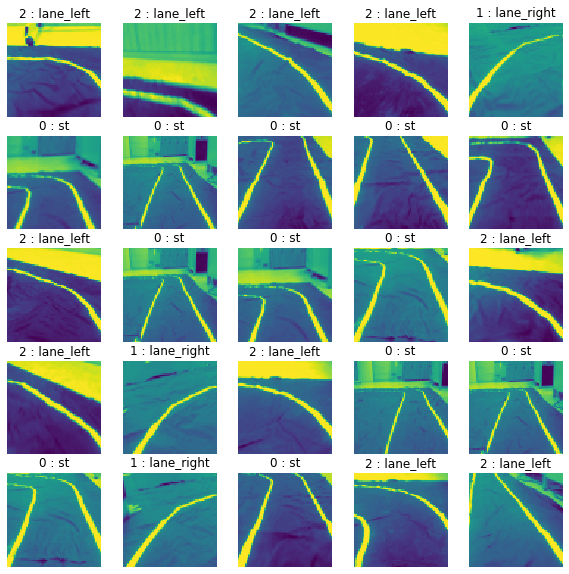

True : 2, Predict : 2
True : 0, Predict : 0
True : 2, Predict : 2
True : 2, Predict : 2
True : 2, Predict : 2
True : 2, Predict : 2
True : 2, Predict : 2
True : 2, Predict : 2
True : 2, Predict : 2
True : 0, Predict : 0
554/554 [==============================] - 5s 10ms/step
## evaluation loss and_metrics ##
[0.12144734258578573, 0.95848375472781455]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 64, 32)        320       
_________________________________________________________________
activation_9 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 21, 21, 32)        0         
_____________________________________________________

In [7]:
model = NeuralNetwork()
model.create_VGG_net()
#model.train(x_train= x_train1, y_train = y_train1, epochs= 50, learning_rate=1e-4, batch_size= 256)
model.train(x_train= x_train1, y_train = y_train1, epochs= 20, learning_rate=1e-4, batch_size= 128)
model.show__test__data(x_test1, y_test1)
model.show_prediction(x_test1, y_test1)
model.evaluate(x_test1, y_test1)
model.summary()

In [5]:

class NeuralNetwork():
    
    def __init__(self):
        pass
    def summary(self):
        self.model.summary()
    def show_prediction(self, x_test, y_test, n = 10):
        xhat_idx = np.random.choice(x_test.shape[0], n)
        xhat = x_test[xhat_idx]
        yhat_classes = self.model.predict_classes(xhat)
        for i in range(n):
            print('True : ' + str(np.argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat_classes[i]))

    def evaluate(self, x_test, y_test , batch_size = 256):
        self.batch_size = batch_size
        loss_and_metrics = self.model.evaluate(x_test, y_test, self.batch_size)
        print('## evaluation loss and_metrics ##')
        print(loss_and_metrics)
    
    def show__test__data(self, x, y):
        print("show data!!!")

        plt_row = 5
        plt_col = 5
        plt.rcParams["figure.figsize"] = (10, 10)

        f, axarr = plt.subplots(plt_row, plt_col)

        for i in range(plt_row * plt_col):

            sub_plt = axarr[int(i / plt_row), int(i % plt_col)]
            sub_plt.axis('off')
            sub_plt.imshow(x[i].reshape(64, 64))

            label = np.argmax(y[i])

            if label == 0:
                direction = 'st'
            elif label == 1:
                direction = 'lane_right'
            elif label == 2:
                direction = 'lane_left'

            sub_plt_title = str(label) + " : " + direction
            sub_plt.set_title(sub_plt_title)

        plt.show()
    def train(self, x_train, y_train, epochs = 50, learning_rate = 1e-4 , batch_size = 256, split_ratio = 0.2):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.split_ratio = split_ratio

        opt = Adam(lr = self.learning_rate, decay= self.learning_rate / self.epochs)
        self.model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

        self.hist = self.model.fit(x_train, y_train, epochs=self.epochs, batch_size=self.batch_size, validation_split=self.split_ratio, verbose=2)
    
    def create_VGG_net(self, raw=64, column=64, channel=1):
        print('create VGG model!!')

        inputShape = (raw, column, channel)

        init = 'he_normal'
        # init = 'glorot_normal'
        activation = 'relu'
        keep_prob_conv = 0.25
        keep_prob_dense = 0.5

        chanDim = -1
        classes = 3

        model = Sequential()

        # CONV => RELU => POOL
        model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape, kernel_initializer=init))
        model.add(Activation(activation))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(3, 3)))
        model.add(Dropout(keep_prob_conv))

        # (CONV => RELU) * 2 => POOL
        model.add(Conv2D(64, (3, 3), padding="same", kernel_initializer=init))
        model.add(Activation(activation))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same", kernel_initializer=init))
        model.add(Activation(activation))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(keep_prob_conv))

        # (CONV => RELU) * 2 => POOL
        model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer=init))
        model.add(Activation(activation))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer=init))
        model.add(Activation(activation))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(keep_prob_conv))

        # (CONV => RELU) * 2 => POOL
        model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer=init))
        model.add(Activation(activation))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer=init))
        model.add(Activation(activation))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(keep_prob_conv))

        # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(1024, kernel_initializer=init))
        model.add(Activation(activation))
        model.add(BatchNormalization())
        model.add(Dropout(keep_prob_dense))

        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        # return the constructed network architecture
        self.model = model
    
    def create_posla_net(self, raw=64, column=64, channel=1):
        # model setting
        inputShape = (raw, column, channel)

        activation = 'relu'
        keep_prob_conv = 0.25
        keep_prob_dense = 0.5

        # init = 'glorot_normal'
        # init = 'he_normal'
        init = 'he_uniform'
        chanDim = -1
        classes = 3

        model = Sequential()

        # CONV => RELU => POOL
        model.add(Conv2D(3, (3, 3), padding="valid", input_shape=inputShape, kernel_initializer=init, activation=activation))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(9, (3, 3), padding="valid", kernel_initializer=init, activation=activation))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(18, (3, 3), padding="valid", kernel_initializer=init, activation=activation))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(32, (3, 3), padding="valid", kernel_initializer=init, activation=activation))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Flatten())

        model.add(Dense(80, kernel_initializer=init, activation=activation))
        model.add(Dropout(keep_prob_dense))

        model.add(Dense(15, kernel_initializer=init, activation=activation))
        model.add(Dropout(keep_prob_dense))

        # softmax classifier
        model.add(Dense(classes, activation='softmax'))

        self.model = model

In [174]:
print(len(training_data))

1846


In [11]:
import random
random.shuffle(training_data)
for sample in training_data:
    print(sample[1])

0
2
1
0
2
0
2
0
1
1
0
2
0
0
0
1
1
0
1
1
0
1
1
0
1
2
2
0
1
1
2
1
0
1
2
0
2
0
2
1
2
0


In [131]:
X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3 ,random_state= 42)

In [132]:
print(x_train.shape)
print(x_test.shape)
print(y_train)
print(y_test)

(29, 64, 64, 1)
(13, 64, 64, 1)
[1, 1, 1, 1, 2, 0, 0, 1, 0, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 1, 2]
[2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 0, 0, 0]


In [71]:
x_train = np.empty((0, IMG_SIZE, IMG_SIZE, 1))
y_train = np.empty((0,3))

In [72]:
y_train

array([], shape=(0, 3), dtype=float64)

In [73]:
# X.shape
# x_train = np.vstack((x_train, X))
# y_train = np.vstack((y_train, y))

In [32]:
#모든 파이썬 데이터 객체를 저장하고 읽을 수 있다.
import pickle
pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [33]:
pickle_in = open('X.pickle', 'rb')
X = pickle.load(pickle_in)

In [34]:
X[1]

array([[[71],
        [74],
        [73],
        ..., 
        [89],
        [86],
        [85]],

       [[72],
        [74],
        [75],
        ..., 
        [91],
        [88],
        [88]],

       [[73],
        [76],
        [79],
        ..., 
        [94],
        [92],
        [90]],

       ..., 
       [[78],
        [80],
        [79],
        ..., 
        [92],
        [95],
        [94]],

       [[73],
        [75],
        [74],
        ..., 
        [84],
        [85],
        [87]],

       [[70],
        [69],
        [71],
        ..., 
        [78],
        [80],
        [83]]], dtype=uint8)

In [14]:
#(x_train, y_train), (x_test, y_test) = training_data

# one-hot encoding
y_train_one_hot = tf.squeeze(tf.one_hot(y, 3),axis=1)
#y_test_one_hot = tf.squeeze(tf.one_hot(y_test, 3),axis=1)

ValueError: Can not squeeze dim[1], expected a dimension of 1, got 3 for 'Squeeze' (op: 'Squeeze') with input shapes: [42,3].

In [15]:
dataset = tf.data.Dataset.from_tensor_slices((X, y))

In [32]:
def _read_py_function(path, label):
    image = read_image(path)
    label = np.array(label, dtype=np.uint8)
    return image.astype(np.int32), label

In [33]:
def _resize_function(image_decoded, label):
    image_decoded.set_shape([None, None, None])
    image_resized = tf.image.resize_images(image_decoded, [28, 28])
    return image_resized, label

In [27]:
dataset = dataset.map(lambda data_list, label_list: tuple(tf.py_func(_read_py_function, [data_list, label_list], [tf.int32, tf.uint8])))

In [25]:
dataset = dataset.map(_resize_function)

In [28]:
dataset = dataset.repeat(100)
#dataset = dataset.shuffle(buffer_size=(int(len(data_list) * 0.4) + 3 * batch_size))

In [29]:
dataset = dataset.batch(batch_size)

NameError: name 'batch_size' is not defined

'/home/pirl/Downloads/testData/11_000/11_014.jpg'

11000


('/home/pirl/Downloads/testData/11_000/11_002.jpg', 11000)

In [57]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Flatten, Dense, Activation
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.python.keras.layers.core import Dropout
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.layers.normalization import BatchNormalization

import numpy as np
import glob
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [133]:
def load_data(path = '/home/pirl/Downloads/testData/training_data/*.npz', random_state = 42):
    # DATADIR = '/home/pirl/Downloads/testData'
    # CATEGORIES = ['11_000', '11_001', '11_002']
    x_train = np.empty((0, 64, 64, 1))
    y_train = np.empty((0, 4))
    training_data = glob.glob(path)

    for single_npz in training_data:
        with np.load(single_npz) as data:
            x = data['train']
            print(x)
            y = data['training_labels']
            print(y)
        x = np.reshape(x, (-1, 64, 64, 1))

        x_train = np.vstack((x_train, x))
        y_train = np.vstack((y_train, y))

    # 트레이닝셋을 잘못 만들어서 잘라줘함
    #y_train = y_train[:, :-1]

    print('load data!!!')

    # train test split, 7:3
    return train_test_split(x_train, y_train, test_size=0.3, random_state= random_state)


In [124]:
x_train, x_test, y_train, y_test = load_data(random_state = 41)

[[170 168 178 ..., 123 121 120]
 [150 144 142 ..., 152 133 135]
 [149 149 149 ..., 121 117 116]
 ..., 
 [253 253 253 ...,  86  86  87]
 [253 253 253 ...,  88  87  88]
 [253 253 253 ...,  89  89  90]]
[]


ValueError: all the input arrays must have same number of dimensions